## DATA MINING LAB
### DIGITAL ASSIGNMENT-4
#### PRATIK DAWAR 22BCE0129

Train kNN classifier using sklearn digts dataset (e. from sklearn.datasets import
load_digits) and then,
Now do some exploratory data analysis to figure out how data are linearly/non linearly
separable.
Figure out if any pre-processing such as scaling would help here
Measure accuracy of your model using at least for 4 different K value and Use 80% of samples as
training data size.
Compare its accuracy with Niave bayes and Decision tree. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
# Exploratory Data Analysis (EDA)
print(f"Dataset shape: {X.shape}")  # Number of samples and features
print(f"Unique classes: {np.unique(y)}")

Dataset shape: (1797, 64)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


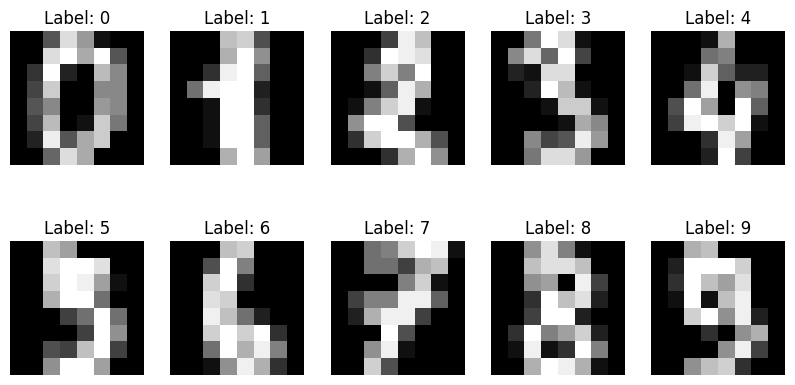

In [4]:
# Visualizing first few digits
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img, label in zip(axes.ravel(), digits.images, digits.target):
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis("off")
plt.show()


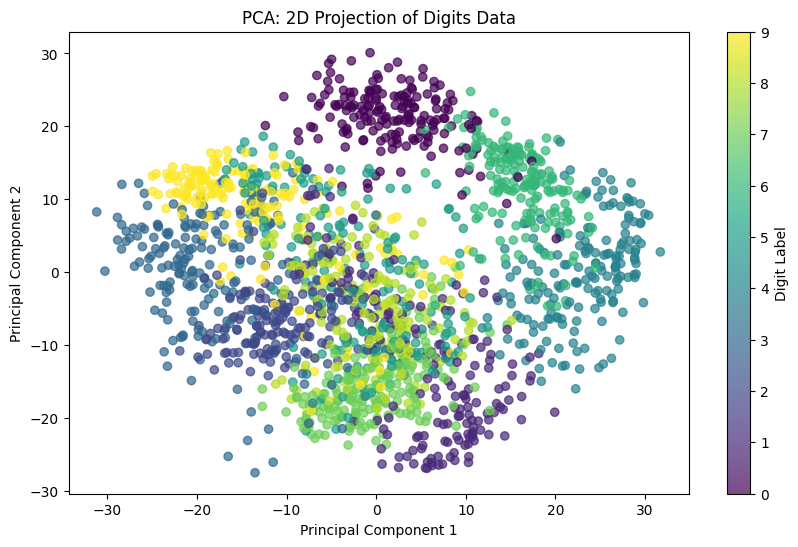

In [ ]:
# Checking linear separability using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
    
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.title("PCA: 2D Projection of Digits Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [6]:
# Preprocessing - Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
# kNN Classifier with different K values
k_values = [3, 5, 7, 9]
knn_accuracies = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies[k] = acc
    print(f"kNN Accuracy with k={k}: {acc:.4f}")

kNN Accuracy with k=3: 0.9694
kNN Accuracy with k=5: 0.9750
kNN Accuracy with k=7: 0.9722
kNN Accuracy with k=9: 0.9722


In [8]:
# Naïve Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {nb_accuracy:.4f}")

Naïve Bayes Accuracy: 0.7667


In [9]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.8417


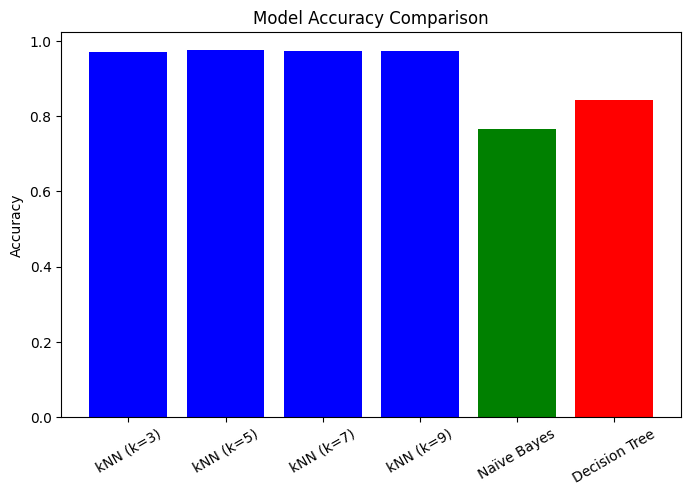

In [10]:
# Compare accuracies
plt.figure(figsize=(8, 5))
plt.bar(["kNN (k=3)", "kNN (k=5)", "kNN (k=7)", "kNN (k=9)", "Naïve Bayes", "Decision Tree"],
        [knn_accuracies[3], knn_accuracies[5], knn_accuracies[7], knn_accuracies[9], nb_accuracy, dt_accuracy],
        color=["blue", "blue", "blue", "blue", "green", "red"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.show()